# Run An Odds Ratio

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/suplements_3_cohort_age_optimized/unstandardized_data'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'
sheet = 'master_list_proper_subjects'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,211,58.7,NaN,NaN,NaN,NaN,-0.415745,-0.189000,19.900000,19.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,152,69.4,NaN,NaN,NaN,NaN,-0.701419,-0.455000,17.900000,17.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,208,79.2,NaN,NaN,NaN,NaN,-0.929958,-0.669000,16.300000,16.300000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,223,71.1,NaN,NaN,NaN,NaN,-0.829972,-0.575000,17.000000,17.000000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [18]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [4]:
drop_list = ['Z_Scored_Percent_Cognitive_Improvement', 'Subiculum_Group_By_24', 'City', 'Age_Group']

In [5]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,86,57.0,NaN,0.598787,-0.099428,0.000000,-0.087220,-0.621000,22.200000,22.200000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,87,65.0,NaN,0.598787,-0.099428,0.000000,0.598397,0.173000,27.000000,27.000000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,88,65.0,NaN,5.854050,2.637141,15.384615,0.269872,-0.207000,24.700000,24.700000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,89,67.0,NaN,0.598787,-0.099428,0.000000,-0.158639,-0.694000,21.700000,21.700000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [6]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

Set the parameters for dropping rows

In [9]:
column = 'City'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'Queensland' # The value to drop if found

In [10]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,39,63.0,0.000000,0.598787,0.111651,0.000000,-0.044369,-0.119000,22.500000,22.500000,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,40,77.0,0.000000,0.598787,0.111651,0.000000,0.969773,1.170000,29.600000,29.600000,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,48,73.0,-0.500000,0.513389,-0.362865,-0.250000,0.355574,0.390000,25.300000,25.300000,...,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,49,68.0,0.000000,0.427991,-0.837381,-0.500000,-0.544298,-0.756000,19.000000,19.000000,...,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Invert Distributions**

In [ ]:
from calvin_utils.statistical_utils.distribution_statistics import invert_distribution
mask = data_df['City'] == 'Toronto'
data_df.loc[mask, ['Cognitive_Baseline']] = invert_distribution(data_df.loc[mask, ['Cognitive_Baseline']])

mask = data_df['City'] == 'Queensland'
data_df.loc[mask, ['Cognitive_Baseline']] = invert_distribution(data_df.loc[mask, ['Cognitive_Baseline']])

mask = data_df['City'] == 'Toronto'
data_df.loc[mask, ['Cognitive_Score_1_Yr']] = invert_distribution(data_df.loc[mask, ['Cognitive_Score_1_Yr']])

mask = data_df['City'] == 'Queensland'
data_df.loc[mask, ['Cognitive_Score_1_Yr']] = invert_distribution(data_df.loc[mask, ['Cognitive_Score_1_Yr']])


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None #['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Standard Columns by Mask

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def mask_and_zscore(df, mask_column, zscore_columns, reference_column=None):
    """
    For a given DataFrame, create a mask based on the unique values of a specified column. 
    Then, for each column in a provided list, replace the values with z-scored counterparts 
    using only the indices corresponding to the mask.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to operate on.
    - mask_column (str): The column name to use for creating the mask based on its unique values.
    - zscore_columns (list): A list of column names for which the values will be replaced with their z-scored counterparts.

    Returns:
    - pandas.DataFrame: The modified DataFrame with specified columns z-scored within the mask.
    """

    # Create a mask from unique values in the specified column
    unique_values = df[mask_column].unique()
    if reference_column is not None:
        for cohort in unique_values:
            mask = df[mask_column] == cohort

            for column in zscore_columns:
                if column in df.columns:
                    # Use dropna() to ensure no NaNs interfere, though you mentioned there are none
                    cohort_values = df.loc[mask, column].dropna()
                    reference_values = df.loc[mask, reference_column].dropna() if reference_column else cohort_values

                    mean_reference = reference_values.mean()
                    std_reference = reference_values.std()

                    if std_reference > 0:  # Ensuring standard deviation is not zero
                        z_scores = (cohort_values - mean_reference) / std_reference
                        df.loc[mask, column] = z_scores
                    else:
                        # Handle the case where std is 0, if needed, such as assigning a default value
                        pass
                else:
                    print(f"Column '{column}' not found in DataFrame.")

        # for cohort in unique_values:
        #     mask = df[mask_column] == cohort

        #     # For each column in the list, replace values with z-scored counterparts within the mask
        #     for column in zscore_columns:
        #         if column in df.columns:
        #             # Compute z-scores for the masked subset of the column
        #             z_scores = (df.loc[mask, [column]] - np.mean(df.loc[mask, [reference_column]])) / np.std(df.loc[mask, [reference_column]])
        #             # Replace the original values with z-scores within the mask
        #             df.loc[mask, column] = z_scores
        #         else:
        #             print(f"Column '{column}' not found in DataFrame.")
        
    else:
        for cohort in unique_values:
            mask = df[mask_column] == cohort

            # For each column in the list, replace values with z-scored counterparts within the mask
            for column in zscore_columns:
                if column in df.columns:
                    # Compute z-scores for the masked subset of the column
                    z_scores = (df.loc[mask, [column]] - np.mean(df.loc[mask, [column]])) / np.std(df.loc[mask, [column]])
                    # Replace the original values with z-scores within the mask
                    df.loc[mask, column] = z_scores
                else:
                    print(f"Column '{column}' not found in DataFrame.")

    return df

In [ ]:
data_df['Cognitive_Baseline'].isna().sum()
data_df['Cognitive_Score_1_Yr'].isna().sum()

In [ ]:
df2 = mask_and_zscore(data_df.copy(), mask_column='City', zscore_columns=['Cognitive_Score_1_Yr'])#, reference_column='Cognitive_Baseline')
df2['Cognitive_Score_1_Yr']
df2 = mask_and_zscore(df2, mask_column='City', zscore_columns=['Cognitive_Baseline'])
df2['Cognitive_Baseline']

Normalize Data

In [15]:
def min_max_normalize_minus_one_to_one(series, reference_series=None):
    """
    Normalize a series to the range [-1, 1]. If a reference series is provided,
    use its min and max values for normalization; otherwise, use the series' own min and max values.

    Parameters:
    series (pd.Series): The series to be normalized.
    reference_series (pd.Series, optional): The reference series to use for normalization.

    Returns:
    pd.Series: The normalized series with values in the range [-1, 1].
    """
    if reference_series is not None:
        min_val = reference_series.min()
        max_val = reference_series.max()
        return 2 * (series - min_val) / (max_val - min_val) - 1
    else:
        min_val = series.min()
        max_val = series.max()
        return 2 * (series - min_val) / (max_val - min_val) - 1


In [17]:
grouping_col = 'City'  # Ensures normalization is only applied to rows falling into these categories
col_to_normalize = 'Cognitive_Baseline'
reference_col = 'Cognitive_Baseline'

# Apply the normalization using the reference series
data_df[f'{col_to_normalize}_normalized'] = data_df.groupby(grouping_col).apply(
    lambda group: min_max_normalize_minus_one_to_one(group[col_to_normalize], group[reference_col])
).reset_index(level=0, drop=True)

Invert a Distribution

In [34]:
def invert_distribution(series):
    """
    Invert the distribution of a series.

    Parameters:
    series (pd.Series): The series to be inverted.

    Returns:
    pd.Series: The series with its distribution inverted.
    """
    max_val = series.max()
    return max_val - series

In [35]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [38]:
grouping_col = 'City'  # Ensures normalization is only applied to rows falling into these categories
specific_group_to_flip = 'Toronto'
col_to_normalize = 'Cognitive_Baseline_normalized'
import pandas as pd
# Apply the invert distribution function only where City == 'Toronto'
data_df[col_to_normalize] = data_df.apply(
    lambda row: invert_distribution(pd.Series([row[col_to_normalize]]))[0] if row[grouping_col] == specific_group_to_flip else row[col_to_normalize],
    axis=1
)

Categorize Values

In [ ]:
import numpy as np

# Define conditions
conditions = [
    df2['Cognitive_Baseline'] > 2,  # Values over 2
    df2['Cognitive_Baseline'] < -2  # Values under -2
]

# Define choices corresponding to the conditions
choices = [
    1,  # Choice for values over 2
    -1  # Choice for values under -2
]

# Apply conditions and choices, default value is 0 for values between -2 and 2
df2['Cognitive_Baseline'] = np.select(conditions, choices, default=0)


Pivot a Dataframe

In [41]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [42]:
def pivot_dataframe(df, concat_col, category_col):
    # Create a new DataFrame where each unique category becomes a column
    # and the values from concat_col are listed under these category columns
    # First, ensure that the index is reset for the DataFrame to avoid issues during pivoting
    df.reset_index(drop=True, inplace=True)

    # Create a new DataFrame where each row will have the category as a column and the corresponding values
    # from concat_col under that category
    pivoted_df = df.pivot(columns=category_col, values=concat_col)
    
    return pivoted_df

In [49]:
pdf = pivot_dataframe(data_df, 'Cognitive_Score_1_Yr_normalized','StimMatch')
pdf

StimMatch,Match,No Match
0,0.0,NaN
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,0.0,NaN
...,...,...
84,-0.2,NaN
85,-0.2,NaN
86,0.2,NaN
87,NaN,-0.6


In [50]:
pdf.describe()

StimMatch,Match,No Match
count,52.000000,37.000000
mean,0.008654,-0.241892
std,0.388905,0.693573
min,-1.000000,-3.000000
25%,0.000000,-0.400000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


RCT Plotter

In [18]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [28]:
import numpy as np
np.sum(data_df['Cognitive_Baseline_normalized'] == -1)
data_df['City'].unique()

array(['Toronto', 'Wurzburg', 'Boston'], dtype=object)

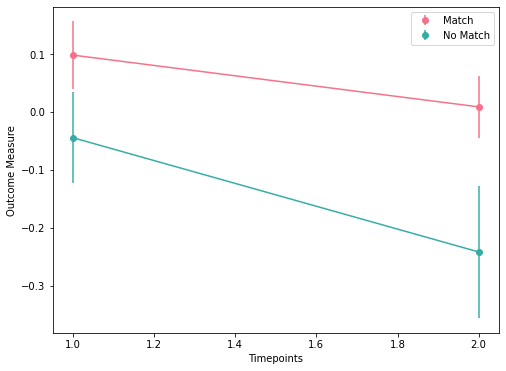

Timepoint 1:
  All - Match vs No Match: t-statistic=1.49, p-value=0.1397
  All - Match vs No Match: welch-statistic=1.49, p-value=0.1397
  All - Match vs No Match: u-statistic=0.72, p-value=0.4715
  All - No Match vs Match: t-statistic=-1.49, p-value=0.1397
  All - No Match vs Match: welch-statistic=-1.49, p-value=0.1397
  All - No Match vs Match: u-statistic=-0.72, p-value=0.4715

Timepoint 2:
  All - Match vs No Match: t-statistic=2.17, p-value=0.0326
  All - Match vs No Match: welch-statistic=2.17, p-value=0.0326
  All - Match vs No Match: u-statistic=1.70, p-value=0.0895
  All - No Match vs Match: t-statistic=-2.17, p-value=0.0326
  All - No Match vs Match: welch-statistic=-2.17, p-value=0.0326
  All - No Match vs Match: u-statistic=-1.70, p-value=0.0895



In [40]:
from calvin_utils.statistical_utils.rct import RCTPlotter

# Initialize the RCTPlotter
plotter = RCTPlotter(data=data_df, obs_cols=['Cognitive_Baseline_normalized', 'Cognitive_Score_1_Yr_normalized'], arm_col='StimMatch', category_col=None, out_dir=out_dir)

# Run the RCTPlotter and display the plot
plotter.run()

Differe in Differences Plotter

In [ ]:
data_df.columns

In [ ]:
from calvin_utils.statistical_utils.rct import DiDAnalysis
analysis = DiDAnalysis(data=data_df, obs_cols=['Cognitive_Baseline', 'Cognitive_Score_1_Yr'], arm_col='StimMatch', category_col='City')

# Run the DiDAnalysis and display the plot
analysis.run()

Propensity Stratification Match

In [ ]:
data_df.columns

In [ ]:
from calvin_utils.statistical_utils.rct import PropensityStratifiedRCTPlotter
ps_rct_plotter = PropensityStratifiedRCTPlotter(data=data_df, obs_cols=['Cognitive_Baseline', 'Cognitive_Score_1_Yr'], arm_col='StimMatch', covariate_cols=['Age', 'Cognitive_Baseline'], n_strata=2)
ps_rct_plotter.run()